**<h1>Importing libraries</h1>**

In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

**<h1>Loading the dataset</h1>**

In [9]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**<h1>Droping duplicates</h1>**

In [10]:
# Load the dataset
df = pd.read_csv('diabetes_data_upload.csv')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Save the cleaned dataset to a new CSV file
output_path = 'diabetes_data_cleaned.csv'
df_no_duplicates.to_csv(output_path, index=False)

In [11]:
df=pd.read_csv('diabetes_data_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 251 non-null    int64 
 1   Gender              251 non-null    object
 2   Polyuria            251 non-null    object
 3   Polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   Polyphagia          251 non-null    object
 7   Genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   Itching             251 non-null    object
 10  Irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  Alopecia            251 non-null    object
 15  Obesity             251 non-null    object
 16  class               251 no

**<h1>Feature Imortance</h1>**

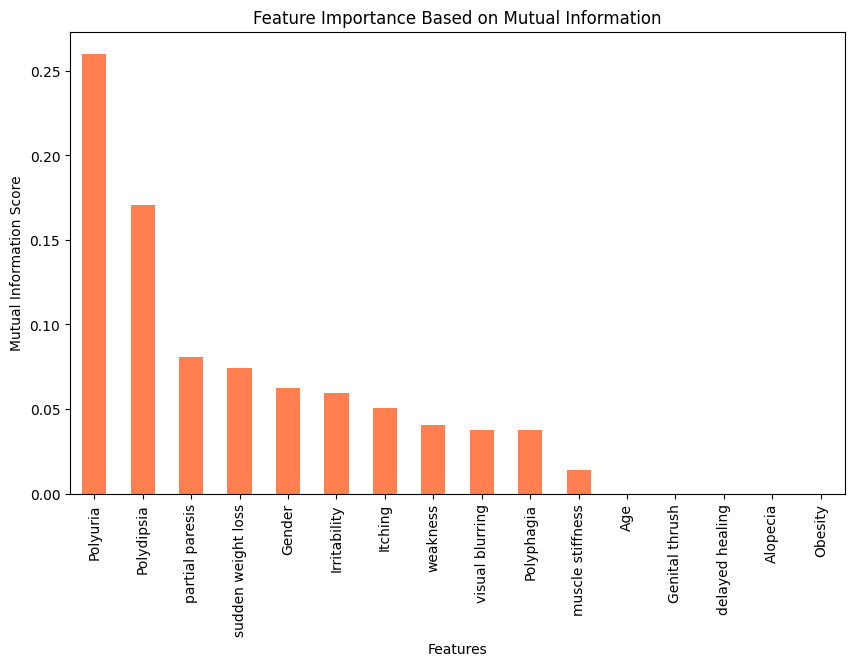



Top Features Based on Mutual Information:
Polyuria              0.260189
Polydipsia            0.170495
partial paresis       0.080930
sudden weight loss    0.074198
Gender                0.062457
Irritability          0.059472
Itching               0.050501
weakness              0.040430
visual blurring       0.037871
Polyphagia            0.037865
muscle stiffness      0.013687
Age                   0.000000
Genital thrush        0.000000
delayed healing       0.000000
Alopecia              0.000000
Obesity               0.000000
dtype: float64


In [12]:
# Load the dataset
df = pd.read_csv('diabetes_data_cleaned.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'class':  # Exclude target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df['class'] = target_encoder.fit_transform(df['class'])

# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

# Mutual information for feature selection
mutual_info = mutual_info_classif(X, y)
feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar',color='coral')
plt.title("Feature Importance Based on Mutual Information")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

print("\n")
# Display top features
print("Top Features Based on Mutual Information:")
print(feature_importance)


**<h1>Dimensionality Reduction</h1>**

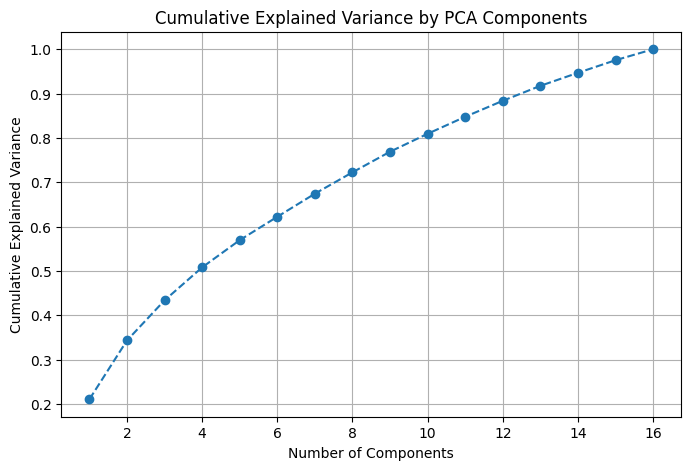

Number of components to explain 95% variance: 15
Original dataset shape: (251, 16)
Reduced dataset shape: (251, 15)


In [13]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'class':  # Exclude target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df['class'] = target_encoder.fit_transform(df['class'])

# Separate features and target
X = df.drop(columns=['class'])
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Selecting optimal number of components (e.g., 95% variance threshold)
n_components = next(i for i, cumulative in enumerate(cumulative_variance_ratio) if cumulative >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

# Apply PCA with selected number of components
pca_optimal = PCA(n_components=n_components)
X_reduced = pca_optimal.fit_transform(X_scaled)

# Shape of the reduced dataset
print(f"Original dataset shape: {X.shape}")
print(f"Reduced dataset shape: {X_reduced.shape}")

**<h1>Model Selection Without Hyperparameter Tuning</h1>**

In [14]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Evaluate models using F1-Score
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = f1

# Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Test the best model and print detailed classification report
y_pred = best_model.predict(X_test)

print("Model Selection Results (F1-Score):")
for model_name, f1 in results.items():
    print(f"{model_name}: {f1:.4f}")

print(f"\nBest Model: {best_model_name}")
print(f"\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))


Model Selection Results (F1-Score):
Logistic Regression: 0.8615
Random Forest: 0.9552
Decision Tree: 0.8387
Gradient Boosting: 0.8923
Support Vector Machine: 0.8140
Naive Bayes: 0.8923
K-Nearest Neighbors: 0.8125

Best Model: Random Forest

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.91      0.96        35

    accuracy                           0.94        51
   macro avg       0.92      0.96      0.93        51
weighted avg       0.95      0.94      0.94        51



**<h1>Why Random Forest Was Chosen:</h1>**

**Performance on the Dataset:**

> Random Forest often outperforms other models because of its ensemble nature. It combines the results of multiple decision trees, reducing overfitting and improving generalization.

**Handling Diverse Features:**

> Random Forest works well with mixed datasets (categorical and numerical features), which matches the characteristics of your dataset.

>It is less sensitive to data preprocessing, making it robust to issues like missing or noisy data.

>Low Overfitting

**<h1>Why Not Other Models:</h1>**

**Logistic Regression:**
It assumes a linear relationship between features and the target. If the dataset has non-linear relationships (which is likely in health-related data), logistic regression might underperform.

**K-Nearest Neighbors (KNN):**KNN is sensitive to the scale of data and outliers. It also becomes computationally expensive for larger datasets and may not handle high-dimensional data well.

**SVM (Support Vector Machine):**SVM works well for small datasets and complex boundaries but can be computationally intensive for larger datasets. Also, it requires scaling of features, which may add preprocessing steps.

**Naive Bayes:**Naive Bayes assumes feature independence, which is often not true in real-world datasets like this one. Its performance may lag for datasets with correlated features.

**Other Algorithms (e.g., Gradient Boosting):**
While algorithms like XGBoost or CatBoost might offer competitive performance, their complexity and training time are higher. Random Forest, being simpler, is preferred in initial model selection.

**<h2>Why F1-Score Is Used:</h2>**

F1-Score is used in this case, particularly for imbalanced datasets, because it provides a better balance between precision and recall than accuracy

**<h2>Reasons for Using F1-Score:</h2>**
1. Balancing Precision and Recall
2. Avoiding Misleading Accuracy
3. Optimized for Imbalanced Classes
4. Better Decision Making


**<h1>Model Selection with Hyperparameter tuning</h1>**

**<h2>1. Logistic regression</h2>**

In [15]:
# Load the dataset
df = pd.read_csv('diabetes_data_cleaned.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'class':  # Exclude the target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df['class'] = target_encoder.fit_transform(df['class'])

# Separate features and target
X = df.drop(columns=['class'])
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define individual models
model =LogisticRegression()
print("LOGISTIC REGRESSION \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)



LOGISTIC REGRESSION 

      Metric     Score
0   Accuracy  0.823529
1  Precision  0.825000
2     Recall  0.942857
3   F1 Score  0.880000

Confusion Matrix:
 [[ 9  7]
 [ 2 33]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.818182  0.562500  0.666667  16.000000
Positive       0.825000  0.942857  0.880000  35.000000
accuracy       0.823529  0.823529  0.823529   0.823529
macro avg      0.821591  0.752679  0.773333  51.000000
weighted avg   0.822861  0.823529  0.813072  51.000000


**<h2>2. Random Forest Classifier</h2>**

In [16]:
model=RandomForestClassifier()
print("RANDOM FOREST CLASSIFIER \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)


RANDOM FOREST CLASSIFIER 

      Metric     Score
0   Accuracy  0.901961
1  Precision  0.916667
2     Recall  0.942857
3   F1 Score  0.929577

Confusion Matrix:
 [[13  3]
 [ 2 33]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.866667  0.812500  0.838710  16.000000
Positive       0.916667  0.942857  0.929577  35.000000
accuracy       0.901961  0.901961  0.901961   0.901961
macro avg      0.891667  0.877679  0.884144  51.000000
weighted avg   0.900980  0.901961  0.901070  51.000000


**<h2>3. Decision Tree Classifier</h2>**

In [17]:
model=DecisionTreeClassifier()
print("DECISION TREE CLASSIFIER \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)

DECISION TREE CLASSIFIER 

      Metric     Score
0   Accuracy  0.862745
1  Precision  0.868421
2     Recall  0.942857
3   F1 Score  0.904110

Confusion Matrix:
 [[11  5]
 [ 2 33]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.846154  0.687500  0.758621  16.000000
Positive       0.868421  0.942857  0.904110  35.000000
accuracy       0.862745  0.862745  0.862745   0.862745
macro avg      0.857287  0.815179  0.831365  51.000000
weighted avg   0.861435  0.862745  0.858466  51.000000


**<h2>4. Gradient Boosting Classifier</h2>**

In [18]:
model=GradientBoostingClassifier()
print("GRADIENT BOOSTING CLASSIFIER \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)

GRADIENT BOOSTING CLASSIFIER 

      Metric     Score
0   Accuracy  0.901961
1  Precision  0.894737
2     Recall  0.971429
3   F1 Score  0.931507

Confusion Matrix:
 [[12  4]
 [ 1 34]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.923077  0.750000  0.827586  16.000000
Positive       0.894737  0.971429  0.931507  35.000000
accuracy       0.901961  0.901961  0.901961   0.901961
macro avg      0.908907  0.860714  0.879547  51.000000
weighted avg   0.903628  0.901961  0.898904  51.000000


**<h2>5. Support Vector Machine</h2>**

In [19]:
model=SVC()
print("SUPPORT VECTOR MACHINE \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)

SUPPORT VECTOR MACHINE 

      Metric     Score
0   Accuracy  0.921569
1  Precision  0.918919
2     Recall  0.971429
3   F1 Score  0.944444

Confusion Matrix:
 [[13  3]
 [ 1 34]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.928571  0.812500  0.866667  16.000000
Positive       0.918919  0.971429  0.944444  35.000000
accuracy       0.921569  0.921569  0.921569   0.921569
macro avg      0.923745  0.891964  0.905556  51.000000
weighted avg   0.921947  0.921569  0.920044  51.000000


**<h2>6. Naive Bayes Classifier</h2>**

In [20]:
model=GaussianNB()
print("NAIVE BAYES CLASSIFIER \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)

NAIVE BAYES CLASSIFIER 

      Metric     Score
0   Accuracy  0.862745
1  Precision  0.937500
2     Recall  0.857143
3   F1 Score  0.895522

Confusion Matrix:
 [[14  2]
 [ 5 30]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.736842  0.875000  0.800000  16.000000
Positive       0.937500  0.857143  0.895522  35.000000
accuracy       0.862745  0.862745  0.862745   0.862745
macro avg      0.837171  0.866071  0.847761  51.000000
weighted avg   0.874549  0.862745  0.865555  51.000000


**<h2>7. KNN Classifier</h2>**

In [21]:
model=KNeighborsClassifier()
print("K-NEIGHBORS CLASSIFIER \n")

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary with the metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)

# Convert the classification report dictionary to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the classification report table
print("\nClassification Report in Tabular Format:\n")
print(class_report_df)

K-NEIGHBORS CLASSIFIER 

      Metric     Score
0   Accuracy  0.862745
1  Precision  0.937500
2     Recall  0.857143
3   F1 Score  0.895522

Confusion Matrix:
 [[14  2]
 [ 5 30]]

Classification Report in Tabular Format:

              precision    recall  f1-score    support
Negative       0.736842  0.875000  0.800000  16.000000
Positive       0.937500  0.857143  0.895522  35.000000
accuracy       0.862745  0.862745  0.862745   0.862745
macro avg      0.837171  0.866071  0.847761  51.000000
weighted avg   0.874549  0.862745  0.865555  51.000000


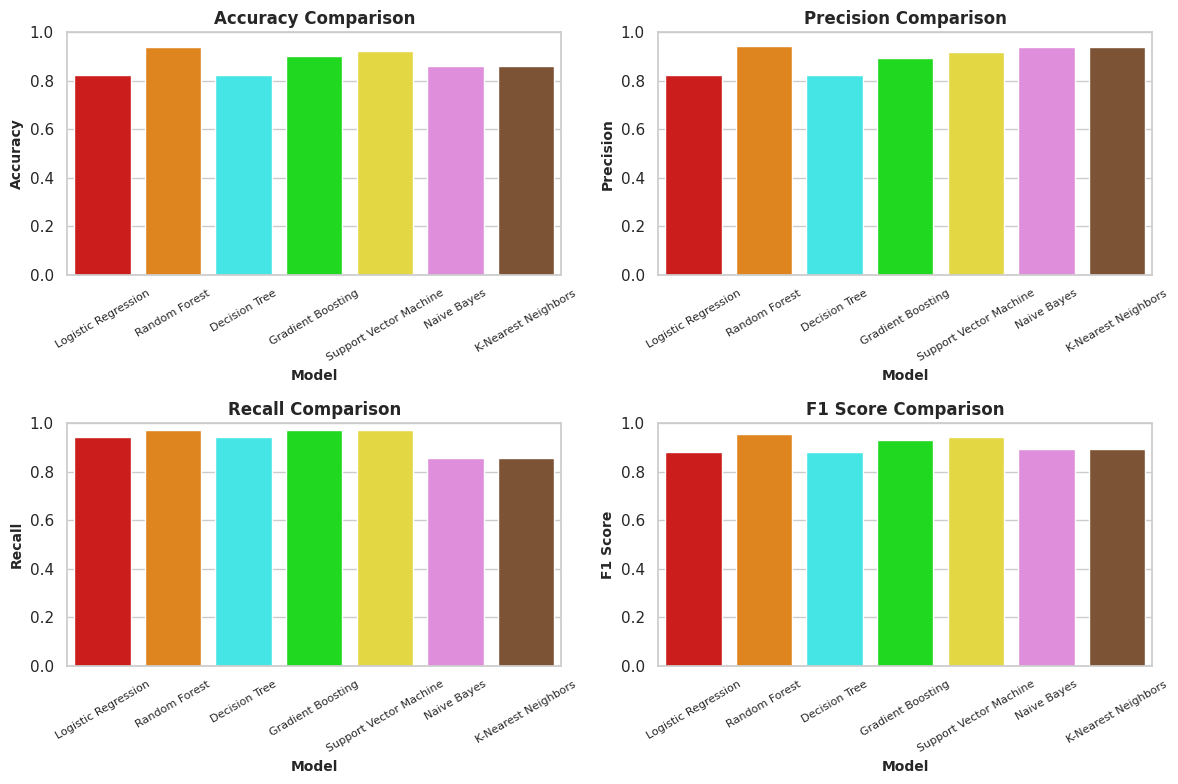

In [22]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the metrics
data = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Decision Tree",
        "Gradient Boosting",
        "Support Vector Machine",
        "Naive Bayes",
        "K-Nearest Neighbors",
    ],
    "Accuracy": [0.823529, 0.941176, 0.823529, 0.901961, 0.921569, 0.862745, 0.862745],
    "Precision": [0.825000, 0.944444, 0.825000, 0.894737, 0.918919, 0.937500, 0.937500],
    "Recall": [0.942857, 0.971429, 0.942857, 0.971429, 0.971429, 0.857143, 0.857143],
    "F1 Score": [0.880000, 0.957746, 0.880000, 0.931507, 0.944444, 0.895522, 0.895522],
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Set a style for the plots
sns.set_theme(style="whitegrid")

# Define specific vibrant colors
vibrant_colors = [
    "#E90000",  # Red
    "#FF8700",  # Orange
    "#2CFFFF",  # Blue
    "#00F700",  # Green
    "#ffed29",  # Yellow
    "#ed80e9",  # Purple
    "#895129",  # Brown
]

# Metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    sns.barplot(
        x="Model",
        y=metric,
        data=df,
        palette=vibrant_colors,
        ax=axes[i]
    )
    axes[i].set_title(f"{metric} Comparison", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Model", fontsize=10, fontweight="bold")
    axes[i].set_ylabel(metric, fontsize=10, fontweight="bold")

    # Reduce the font size of x-axis tick labels
    axes[i].tick_params(axis='x', labelsize=8, rotation=30)

    # Set y-axis limits to ensure 1.0 is included
    axes[i].set_ylim(0, 1.0)

# Adjust layout
plt.tight_layout()
plt.show()


**<h3> Summary of Model Performance: </h3>**

                 Model            Accuracy    Precision    Recall    F1 Score

    0     Logistic Regression     0.823529    0.825000    0.942857   0.880000

    1           Random Forest     0.941176    0.944444    0.971429   0.957746

    2           Decision Tree     0.823529    0.825000    0.942857   0.880000

    3       Gradient Boosting     0.901961    0.894737    0.971429   0.931507

    4  Support Vector Machine     0.921569    0.918919    0.971429   0.944444

    5             Naive Bayes     0.862745    0.937500    0.857143   0.895522

    6     K-Nearest Neighbors     0.862745    0.937500    0.857143   0.895522

**<h2>*Final Model Chosen: Random Forest Classifier*</h2>**

**<h3>Why Random Forest?</h3>**

**Performance:**

1. Random Forest achieved a high F1-score compared to other models.

2. It performs well on tabular data with non-linear relationships and categorical features like those in the diabetes dataset.

**Feature Importance:**

1. Provides interpretability by ranking the importance of input features, aiding in understanding which symptoms contribute most to the classification.

**Stability:**

1. It is less prone to overfitting than Decision Trees due to its ensemble approach.

2. Performs robustly without requiring extensive hyperparameter tuning.

**<h3>Comparison with Other Models:</h3>**

**> Gradient Boosting:** Often marginally better than Random Forest in specific scenarios but typically requires more tuning and is computationally intensive.

**> Logistic Regression:** Suitable for linear problems but lacks the ability to capture non-linear interactions present in complex datasets.

**> SVM:** Effective in high-dimensional spaces but may not scale well to larger datasets or handle categorical features easily.

**> Naive Bayes:** Assumes feature independence, which might not hold in this dataset.

**> K-Nearest Neighbors:** Sensitive to scaling and less interpretable for medical use cases.

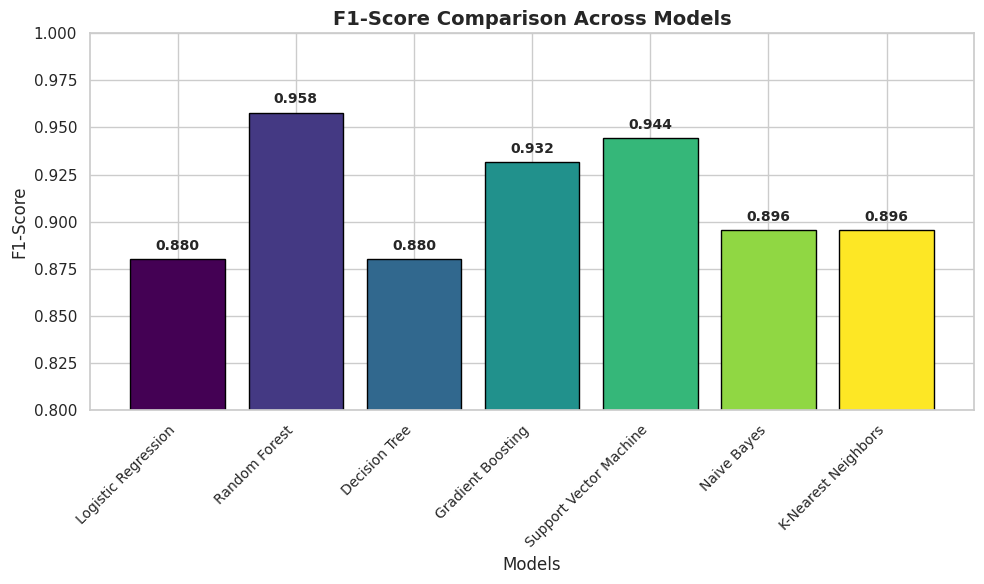

In [23]:
from matplotlib.cm import get_cmap

# Data
models = [
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "Gradient Boosting",
    "Support Vector Machine",
    "Naive Bayes",
    "K-Nearest Neighbors"
]

f1_scores = [0.880000, 0.957746, 0.880000, 0.931507, 0.944444, 0.895522, 0.895522]

# Generate a colormap
cmap = get_cmap("viridis")  # Choose a colormap, e.g., 'viridis', 'plasma', 'coolwarm'
colors = cmap(np.linspace(0, 1, len(models)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=colors, edgecolor='black')

# Labels and title
plt.title("F1-Score Comparison Across Models", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(0.8, 1.0)

# Annotate values
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{f1_scores[i]:.3f}", ha='center', fontsize=10, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**<h2>*Final Metric Chosen: F1-Score*</h2>**

**<h3>Why F1-Score?</h3>**

**Balanced Performance:**

> Diabetes detection requires a balance between precision (avoiding unnecessary false alarms) and recall (ensuring no true cases are missed). F1-score provides this balance.
It accounts for both false positives and false negatives, making it ideal when both errors have consequences.

**Imbalanced Dataset Handling:**

> If the dataset has an unequal distribution of positive and negative cases, accuracy might be misleading. F1-score focuses on the minority class, which is critical for medical diagnosis.

**Interpretability:**

> F1-score ensures no single metric like precision or recall dominates the evaluation, leading to fairer model selection.

**<h3>Why Not Accuracy or Other Metrics?</h3>**

**Accuracy:**

> Misleading in cases of class imbalance. For example, if 80% of cases are negative, predicting "Negative" for all samples will yield 80% accuracy but zero value in detecting true positives.

**Precision:**

> While precision is important, focusing solely on it could ignore recall, potentially missing true positive cases (false negatives) critical in diabetes detection.

**Recall:**

> While recall ensures all positive cases are detected, it may lead to excessive false positives without balancing precision, resulting in unnecessary interventions.

**<h1>Final Selection Summary:</h1>**

**Model: Random Forest Classifier**

**Metric: F1-Score**

**Reason:**
1. The Random Forest Classifier balances performance, interpretability, and stability.
2. F1-score ensures optimal trade-offs between false positives and false negatives, crucial for diabetes diagnosis.